# Trip-Level Emission Analysis
---

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import warnings
warnings.filterwarnings('ignore')

# font
plt.rcParams['font.sans-serif'] = ['Arial']
LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}    

# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

plt.rcParams['figure.dpi'] = 300

> - The trip aggregation data is not available due to data privacy.

## 1 Cleaning

In [2]:
import pickle
with open("Z://Data/NEE_Chengdu/agg/agg_trip_20161120.pkl", 'rb') as f:
    agg_trip = pickle.load(f)

agg_trip = agg_trip[agg_trip['mileage'] <= 0.6].copy()
agg_trip = agg_trip[agg_trip['brakeCount'] > 0].copy()
agg_trip = agg_trip[agg_trip['brakeEventNum'] > 0].copy()
agg_trip.shape

(1108626, 24)

mileage               Axes(0.125,0.11;0.0731132x0.77)
speed_mean         Axes(0.212736,0.11;0.0731132x0.77)
initSpeed_mean     Axes(0.300472,0.11;0.0731132x0.77)
acc_mean           Axes(0.388208,0.11;0.0731132x0.77)
brakeDecel_mean    Axes(0.475943,0.11;0.0731132x0.77)
VSP_mean           Axes(0.563679,0.11;0.0731132x0.77)
grade_mean         Axes(0.651415,0.11;0.0731132x0.77)
brakeFrac          Axes(0.739151,0.11;0.0731132x0.77)
brakingFreq        Axes(0.826887,0.11;0.0731132x0.77)
dtype: object

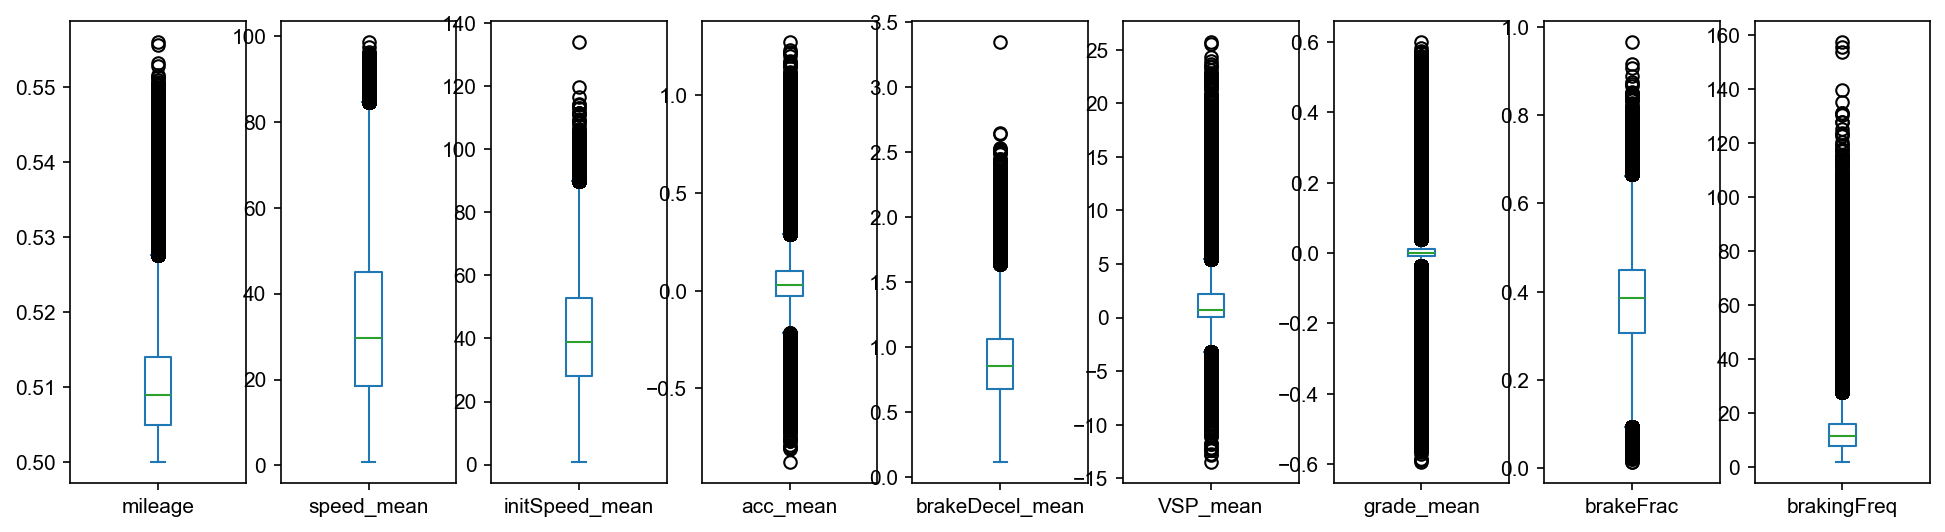

In [ ]:
agg_trip[['mileage', 'speed_mean', 'initSpeed_mean', 'acc_mean', 'brakeDecel_mean', 'VSP_mean', 'grade_mean', 'brakeFrac', 'brakingFreq']].plot(kind='box', subplots=True, sharex=False, figsize=(16,4))

In [ ]:
agg_trip.describe()

,vehID,startHour,trajCount,brakeCount,idlingCount,brakeEventNum,mileage,speed_mean,speed_std,acc_mean,...,VSP_mean,VSP_std,initSpeed_mean,brakeDecel_mean,brakeDecel_std,grade_mean,grade_std,brakeFrac,idlingFrac,brakingFreq
count,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,...,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06,1.108626e+06
mean,2.014468e+04,1.418677e+01,7.697885e+01,2.704544e+01,1.444599e+01,6.557901e+00,5.101261e-01,3.318791e+01,1.256300e+01,4.139033e-02,...,1.420507e+00,1.169699e+01,4.159403e+01,8.837919e-01,6.603596e-01,3.579746e-03,1.190920e-01,3.762691e-01,1.021388e-01,1.289012e+01
std,1.160636e+04,5.595038e+00,5.190552e+01,1.448118e+01,3.030411e+01,4.033457e+00,7.300493e-03,1.779161e+01,4.671242e+00,1.273811e-01,...,2.412632e+00,5.914237e+00,1.740009e+01,2.932116e-01,2.322332e-01,7.973396e-02,1.408593e-01,1.024294e-01,1.619591e-01,7.991100e+00
min,0.000000e+00,0.000000e+00,1.900000e+01,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,7.083995e-01,5.336372e-01,-8.778294e-01,...,-1.352922e+01,6.946276e-01,6.742294e-01,1.123550e-01,0.000000e+00,-5.949662e-01,4.904924e-03,1.333333e-02,0.000000e+00,1.818882e+00
25%,1.008500e+04,1.100000e+01,4.100000e+01,1.600000e+01,0.000000e+00,4.000000e+00,5.049580e-01,1.858082e+01,9.166957e+00,-2.892041e-02,...,5.539490e-03,7.062831e+00,2.797022e+01,6.783293e-01,5.091844e-01,-8.370753e-03,2.982511e-02,3.071429e-01,0.000000e+00,7.795100e+00
50%,2.018900e+04,1.500000e+01,6.200000e+01,2.500000e+01,0.000000e+00,6.000000e+00,5.090201e-01,2.974015e+01,1.227279e+01,2.653185e-02,...,7.450617e-01,1.045707e+01,3.884338e+01,8.561755e-01,6.716560e-01,5.912832e-04,4.999502e-02,3.846154e-01,0.000000e+00,1.162577e+01
75%,3.017400e+04,1.900000e+01,9.800000e+01,3.500000e+01,1.700000e+01,8.000000e+00,5.140137e-01,4.493904e+01,1.573693e+01,9.779969e-02,...,2.176251e+00,1.534135e+01,5.277680e+01,1.064011e+00,8.224768e-01,1.058632e-02,1.557869e-01,4.492754e-01,1.750000e-01,1.586301e+01
max,4.028100e+04,2.300000e+01,2.553000e+03,2.060000e+02,2.339000e+03,7.900000e+01,5.559875e-01,9.845222e+01,3.871405e+01,1.268465e+00,...,2.569508e+01,3.769323e+01,1.339513e+02,3.343777e+00,2.181298e+00,5.989884e-01,9.716353e-01,9.642857e-01,9.161770e-01,1.572212e+02


In [3]:
agg_trip = agg_trip[agg_trip['initSpeed_mean'] <= 120].copy()
agg_trip = agg_trip[agg_trip['acc_mean'] >= -1].copy()
agg_trip = agg_trip[agg_trip['brakeDecel_mean'] <= 3].copy()
agg_trip = agg_trip[(agg_trip['VSP_mean'] >= -15) & (agg_trip['VSP_mean'] <= 25)].copy()
agg_trip = agg_trip[agg_trip['brakingFreq'] <= 140].copy()
agg_trip.shape

(1108619, 24)

## 2 Emission

In [4]:
import numpy as np
OpModeERs = np.load("./data/agg/OpModeERs.npy")
agg_trip['ER'] = agg_trip.apply(lambda x: sum(x['OpModeCount'] / x['trajCount'] * OpModeERs), axis=1)  # g/hr/veh
agg_trip['EF'] = agg_trip.apply(lambda x: x['ER'] * (x['trajCount'] / 3600) / x['mileage'], axis=1)  # g/km/veh

ER       Axes(0.125,0.11;0.352273x0.77)
EF    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

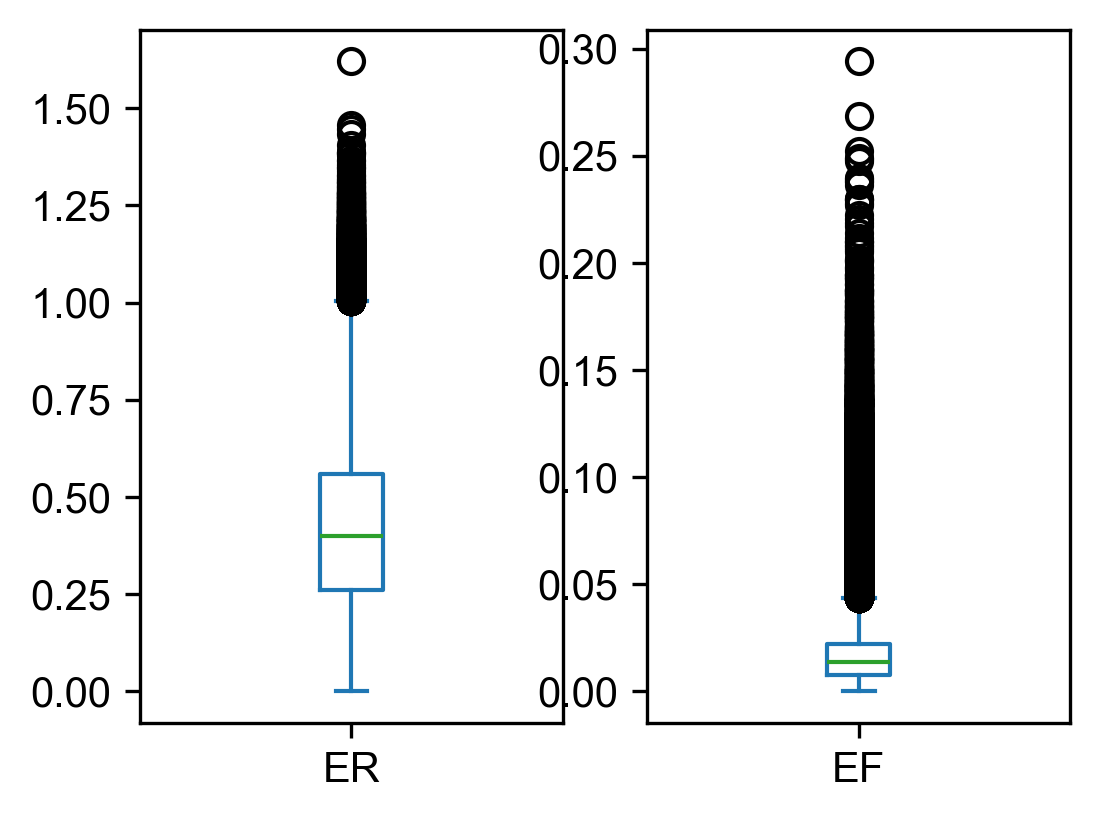

In [6]:
agg_trip[['ER', 'EF']].plot(kind='box', subplots=True, sharex=False, figsize=(4,3))

## 3 Braking params

In [5]:
agg_trip['brakeTime_mean'] = agg_trip['brakeCount'] / agg_trip['brakeEventNum']  # sec

In [9]:
# obtain bins for ER
speedBins = np.arange(0, 110, 10)
initSpeedBins = np.arange(0, 140, 20)
accBins = np.arange(-10, 16, 5) / 10
VSPBins = np.arange(-15, 30, 5)
decelBins = np.arange(0, 2.5, 0.3)
brakeDecelBins = np.arange(0, 28, 3) / 10
brakeFracBins = np.arange(0, 1.2, 0.2)
idleFracBins = np.arange(0, 1.2, 0.2)
gradeBins = np.arange(-2, 2, 1) / 100

import seaborn as sns

def binCal(xCol, yCol, bins, aggFile):
    mean = [aggFile[(aggFile[xCol] >= minV) & (aggFile[xCol] < maxV)][yCol].mean() for minV, maxV in zip(bins[:-1], bins[1:])]
    std = [aggFile[(aggFile[xCol] >= minV) & (aggFile[xCol] < maxV)][yCol].std() for minV, maxV in zip(bins[:-1], bins[1:])]
    
    return mean, std

def distPlot(ax, xCol, binwidth, color, xLabel, subID, aggFile, hline=True):
    sns.histplot(
        aggFile, y=xCol, binwidth=binwidth, stat='proportion',
        element='bars', fill=False, hatch='//', color=color, alpha=0.6, ax=ax
    )
    if hline:
        ax.hlines(
            aggFile[xCol].mean(), 0, ax.get_xbound()[1],
            colors='k', linestyles='dashed',
            label='Mean = %.2f' % aggFile[xCol].mean()
        )
        ax.legend()
    ax.set_xlabel("Proportion\n(%s)"%(subID) if subID else "Proportion", fontdict=LABEL_FONT)
    ax.set_ylabel(xLabel, fontdict=LABEL_FONT)

    return ax

def corrPlot(ax, xCol, yCol, bins, xLabel, yLabel, subID, cmap, aggFile, histBinNum=30):
    # hist plot
    sns.histplot(
        aggFile, x=xCol, y=yCol, bins=histBinNum, stat='proportion', ax=ax,
        fill=True, cmap=cmap, cbar=True, cbar_kws=dict(location='right', shrink=0.8, label="Proportion"),
        )
    binMean, binStd =binCal(xCol, yCol, bins, aggFile=aggFile)
    ax.errorbar(
        bins[:-1]+(bins[1]-bins[0])/2, binMean, binStd,
        color='k', linestyle='dotted', linewidth=1, markerfacecolor='w', marker='d', alpha=0.8,
        label="Average"
    )
    ax.set_xticks(bins)
    ax.set_xlabel("%s\n(%s)"%(xLabel, subID) if subID else xLabel, fontdict=LABEL_FONT)
    ax.set_ylabel(yLabel, fontdict=LABEL_FONT)
    ax.legend()
    ax.grid(axis='x', linestyle=":")

    return ax

In [7]:
# calculate speed bin OpMode fraction
aggFile = agg_trip
xCol, yCol = 'speed_mean', 'OpModeCount'
bins = np.arange(0, 110, 10)
count = [aggFile[(aggFile[xCol] >= minV) & (aggFile[xCol] < maxV)][yCol].sum() for minV, maxV in zip(bins[:-1], bins[1:])]

import pandas as pd
agg_OpMode_speed = pd.DataFrame({"OpModeCount":count}, index=bins[:-1])
agg_OpMode_speed['OpModeFrac'] = agg_OpMode_speed['OpModeCount'].apply(lambda x: x / sum(x))

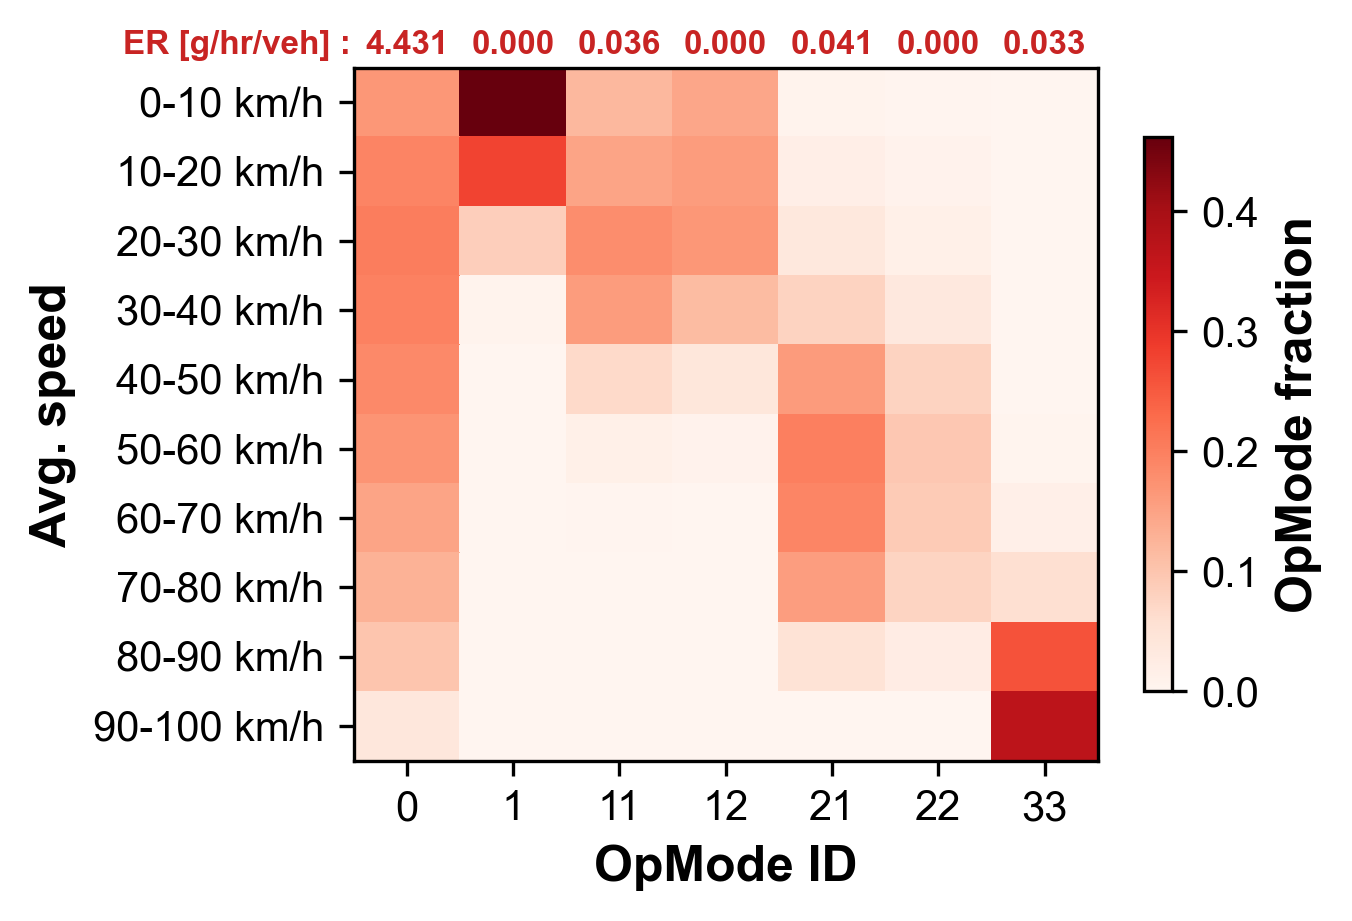

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

cmap = 'Reds'

data = np.array(agg_OpMode_speed['OpModeFrac'].to_list())
# OpModes = [0,1,11,12,13,14,15,16,21,22,23,24,25,27,28,29,30,33,35,37,38,39,40]
OpModes = [0,1,11,12,21,22,33]
ax.pcolor(data[:, [0,1,2,3,8,9,17]], cmap=cmap)
ax.invert_yaxis()
ax.set_xticks(np.arange(len(OpModes))+0.5)
ax.set_xticklabels(OpModes)
ax.set_yticks(np.arange(len(agg_OpMode_speed.index))+0.5)
ax.set_yticklabels(['%d-%d km/h' % (vmin, vmax) for vmin, vmax in zip(bins[:-1], bins[1:])])
ax.set_xlabel("OpMode ID", fontdict=LABEL_FONT)
ax.set_ylabel("Avg. speed", fontdict=LABEL_FONT)

cbar = fig.colorbar(plt.cm.ScalarMappable(
                        norm=Normalize(data.min(), data.max()),
                        cmap=cmap),
                    ax=ax, location='right', shrink=0.8)
cbar.set_label(label='OpMode fraction', fontdict=LABEL_FONT)

ax.text(0-1.1, -0.1, 'ER [g/hr/veh] :', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(0+0.5, -0.1, '4.431', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(1+0.5, -0.1, '0.000', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(2+0.5, -0.1, '0.036', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(3+0.5, -0.1, '0.000', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(4+0.5, -0.1, '0.041', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(5+0.5, -0.1, '0.000', size=8, color=RED, va='bottom', ha='center', weight='bold')
ax.text(6+0.5, -0.1, '0.033', size=8, color=RED, va='bottom', ha='center', weight='bold')

plt.show()

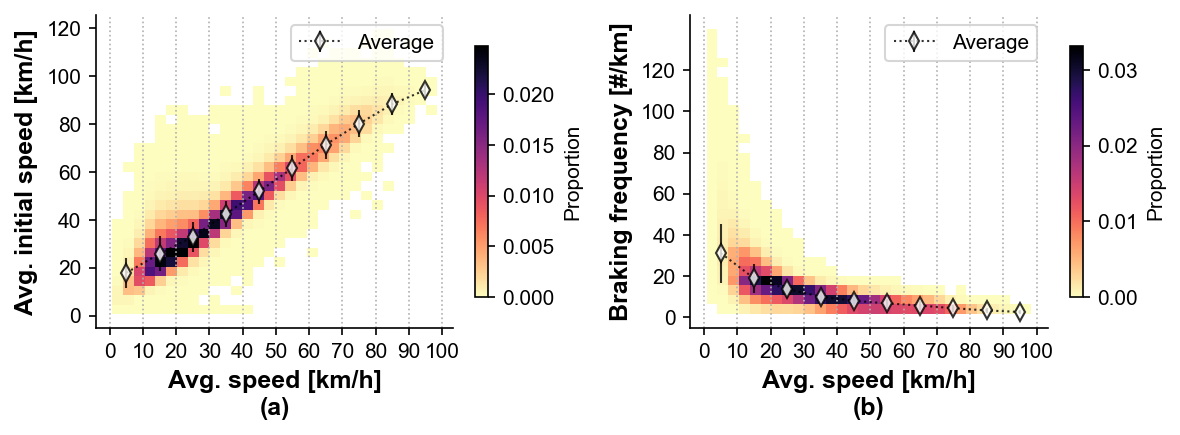

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax = ax.flatten()

ax[0] = corrPlot(
    ax[0], xCol='speed_mean', yCol='initSpeed_mean', xLabel="Avg. speed [km/h]", yLabel="Avg. initial speed [km/h]",bins=np.arange(0,110,10),
    subID='a', cmap='magma_r', aggFile=agg_trip
)
ax[1] = corrPlot(
    ax[1], xCol='speed_mean', yCol='brakingFreq', xLabel="Avg. speed [km/h]", yLabel="Braking frequency [#/km]",bins=np.arange(0,110,10),
    subID='b', cmap='magma_r', aggFile=agg_trip
)
ax[1].set_yticks(np.arange(0, 140, 20))

for ax_ in ax:
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

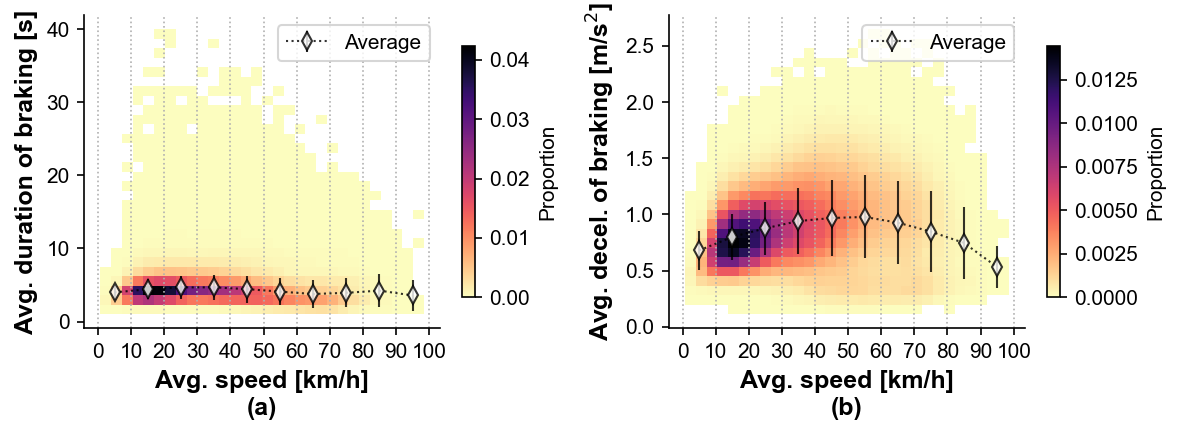

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax = ax.flatten()

ax[0] = corrPlot(
    ax[0], xCol='speed_mean', yCol='brakeTime_mean', xLabel="Avg. speed [km/h]", yLabel="Avg. duration of braking [s]",bins=np.arange(0,110,10),
    subID='a', cmap='magma_r', aggFile=agg_trip
)
ax[1] = corrPlot(
    ax[1], xCol='speed_mean', yCol='brakeDecel_mean', xLabel="Avg. speed [km/h]", yLabel="Avg. decel. of braking [m/s$^2$]",bins=np.arange(0,110,10),
    subID='b', cmap='magma_r', aggFile=agg_trip
)
# ax[1].set_yticks(np.arange(0, 140, 20))

for ax_ in ax:
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

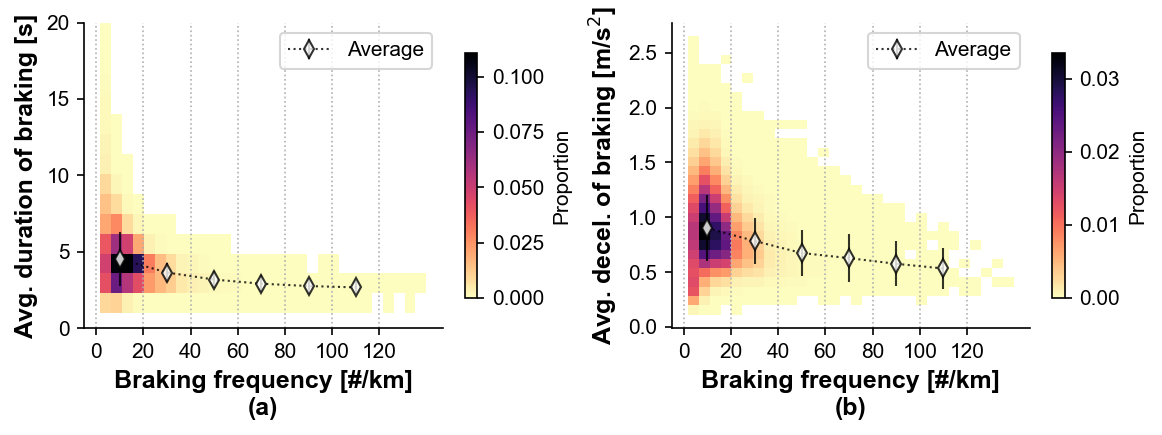

In [13]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax = ax.flatten()

ax[0] = corrPlot(
    ax[0], xCol='brakingFreq', yCol='brakeTime_mean', xLabel="Braking frequency [#/km]", yLabel="Avg. duration of braking [s]",bins=np.arange(0,130,20),
    subID='a', cmap='magma_r', aggFile=agg_trip
)
ax[0].set_ylim(0, 20)
ax[1] = corrPlot(
    ax[1], xCol='brakingFreq', yCol='brakeDecel_mean', xLabel="Braking frequency [#/km]", yLabel="Avg. decel. of braking [m/s$^2$]",bins=np.arange(0,130,20),
    subID='b', cmap='magma_r', aggFile=agg_trip
)
# ax[1].set_yticks(np.arange(0, 140, 20))

for ax_ in ax:
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

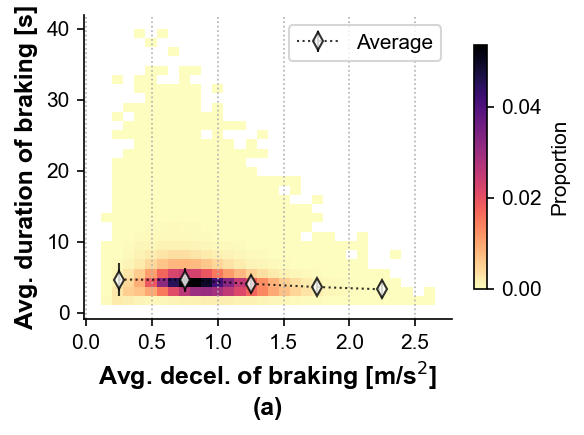

In [18]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax = corrPlot(
    ax, xCol='brakeDecel_mean', yCol='brakeTime_mean', xLabel="Avg. decel. of braking [m/s$^2$]", yLabel="Avg. duration of braking [s]",bins=np.arange(0,26,5)/10,
    subID='a', cmap='magma_r', aggFile=agg_trip
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()